In [1]:
%load_ext autoreload
%autoreload 2
from imports.networks import *
from imports.data import *
from imports.params import p
from imports.utility import *
from imports.architectures import get_architecture

In [31]:
p["channel"] = "low"
p["lr"] = 0.00004
p["batch_size"] = 64
p["nr_epochs"] = 50
use_model = "base_conv_network"
p["architecture"] = get_architecture(use_model, channel=p["channel"])

In [32]:
sw_path = "flamingo_0077/flamingo_0077.hdf5"
data = Data(p, sw_path=sw_path)
filename = p_to_filename(p) + "_M1e13_rad2Mpc"
filename = "obs_data_L1000N1800_HYDRO_FIDUCIAL_SO_500crit_res64_M1e13_rad2Mpc"
data.make_nn_dataset(filename=filename, target="TotalMass")

In [33]:
model = Model(p)
model.set_convolutional_model()
model.set_optimizer()
model.train(data)

Epoch: 0, done in 14.24 seconds
Validation loss: 0.16002856194972992. Train loss: 0.3068162176758051
Epoch: 1, done in 7.30 seconds
Validation loss: 0.0810999944806099. Train loss: 0.10458383448421955
Epoch: 2, done in 3.88 seconds
Validation loss: 0.06915973871946335. Train loss: 0.08271355163305998
Epoch: 3, done in 1.19 seconds
Validation loss: 0.062402643263339996. Train loss: 0.07326107453554868
Epoch: 4, done in 0.82 seconds
Validation loss: 0.05549086630344391. Train loss: 0.06634031049907207
Epoch: 5, done in 0.91 seconds
Validation loss: 0.05062935873866081. Train loss: 0.05924157947301865
Epoch: 6, done in 0.68 seconds
Validation loss: 0.04551888629794121. Train loss: 0.05256896987557411
Epoch: 7, done in 0.71 seconds
Validation loss: 0.0401902012526989. Train loss: 0.04768540794029832
Epoch: 8, done in 0.94 seconds
Validation loss: 0.036378856748342514. Train loss: 0.04280299041420221
Epoch: 9, done in 0.74 seconds
Validation loss: 0.033343005925416946. Train loss: 0.0383367

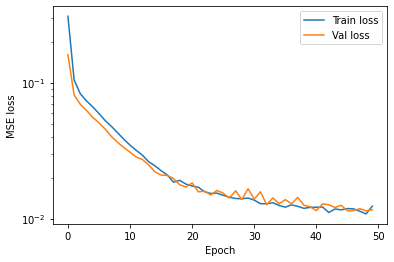

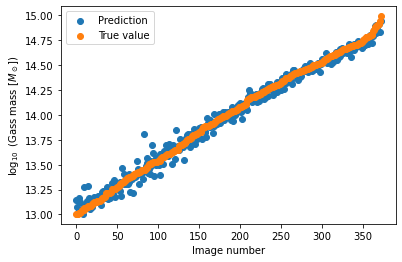

In [34]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.plot(range(len(model.epochs)), model.losses, label="Train loss")
    plt.plot(range(len(model.epochs)), model.val_losses, label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")
    plt.yscale("log")
    plt.legend()
    plt.show()


    prediction = model.model(torch.Tensor(data.testx))
    prediction = prediction * data.std_y + data.mean_y

    testx = data.testx * data.std_x[np.newaxis, :, np.newaxis, np.newaxis] + data.mean_x[np.newaxis, :, np.newaxis, np.newaxis]
    testy = data.testy * data.std_y + data.mean_y

    # print(prediction.T)
    # print(testy)
    args = np.argsort(testy)
    plt.scatter(range(len(testy)), prediction[args], label="Prediction")
    plt.scatter(range(len(testy)), testy[args], label="True value")
    plt.xlabel("Image number")
    plt.ylabel("$\log_{10}$ (Gass mass [$M_\odot$])")
    plt.legend()
    plt.show()

In [ ]:
# test = data.testx * data.std_x + data.mean_x
# print(data.trainx[0,0])
# print(data.trainx[1,0])
print(data.trainy)
# print(data.trainy[1])
for i in range(10):
    plt.imshow(data.trainx[i,0])
    plt.colorbar()
    plt.show()

In [56]:
test = np.load(f"{p['base_data_path']}/obs_data_{p_to_filename(p)}_M1e13_rad1Mpc_halo_indices.npy")
print(test)

[ 4243878  6073953  5455886 11024850  3628391 12901838  6263811   920565
  1036212 11789570  4445297       27  3628265  6560773 10712270  7952153
  5455314  8879505  9097200  6453008]


In [62]:
print(data.soap_file[p["selection_type"]+"/TotalMass"][np.sort(test)])

[1.1503640e+14 4.9134426e+13 8.6311663e+13 1.9598795e+14 3.0511448e+13
 1.2747463e+13 1.1970933e+14 4.0462028e+14 1.7660906e+13 1.1218455e+13
 6.1503932e+13 6.8059770e+14 1.8939088e+14 3.0786326e+14 4.7059098e+14
 9.9725705e+14 3.1665935e+14 1.6612934e+13 8.5624468e+13 2.8037547e+13]


In [6]:
from swiftsimio import load
from swiftsimio.visualisation.projection import project_gas

mask = sw.mask(sw_path)
            

position = soap_file[f"SO/500_crit/CentreOfMass"][0] * unyt.Mpc
# radius = self.soap_file[f"{self.selection_type}/SORadius"][halo_indices[sample]] * unyt.Mpc
radius = 2 * unyt.Mpc
load_box = [[position[0] - radius, position[0] + radius], 
            [position[1] - radius, position[1] + radius], 
            [position[2] - radius, position[2] + radius]]
mask.constrain_spatial(load_box)
data = sw.load(sw_path, mask=mask)

print(data)
print(dir(data))
dasdas
# First create a mass-weighted temperature dataset
data.gas.mass_weighted_temps = data.gas.masses * data.gas.temperatures

# Map in msun / mpc^2
mass_map = project_gas(
    data,
    resolution=1024,
    project="masses",
    parallel=True,
    periodic=True,
)
# Map in msun * K / mpc^2
mass_weighted_temp_map = project_gas(
    data,
    resolution=1024,
    project="mass_weighted_temps",
    parallel=True,
    periodic=True,
)

temp_map = mass_weighted_temp_map / mass_map

from unyt import K
temp_map.convert_to_units(K)

from matplotlib.pyplot import imsave
from matplotlib.colors import LogNorm

plt.imshow(temp_map)

NameError: name 'self' is not defined